In [13]:
import yaml 
import logging
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(
    handlers=(logging.StreamHandler(), logging.FileHandler('analysis.log')), 
    level=logging.INFO,
    )

class Analysis:
    def __init__(self, config_file_path):
        self.config_file_path = config_file_path
        self.config = None
    
    def analysis_obj(self):
        try:
            with open(self.config_file_path, 'r') as file:
                self.config = yaml.safe_load(file)
        #     configtable = {}
        #     configtable.update(self.config)
        #     logging.info(f'Successfully loaded {self.config}')
        except FileNotFoundError:
            print(f"Error: Config file '{self.config_file_path}' not found.")
            logging.error(f"Error: Config file '{self.config_file_path}' not found.")
        except yaml.YAMLError as e:
            print(f"Error: Failed to load config file. {e}")
            logging.error(f"Error: Failed to load config file. {e}")
        assert type(self.config_file_path) == str, f"Path, {self.config_file_path} must be a string"
        return self.config    
config1 = Analysis('user_config.yml')
configfile = config1.analysis_obj()


In [7]:
import requests
requests.post(
    configfile['ntfy']['url'],
    data=configfile['ntfy']['message'].encode('utf-8'),
    headers={'Title': configfile['ntfy']['title']}
)

<Response [200]>

In [10]:
def notify_done(message: str) -> None:
    requests.post(
    configfile['ntfy']['url'],
    data=message.encode('utf-8'),
    headers={'Title': configfile['ntfy']['title']})
    

notify_done('Jimmy')

In [50]:
print(configfile['data'])

https://raw.githubusercontent.com/struongest1/DSI_Software_Assignment/main/forest_area_km.csv


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_url = configfile['data']

try:
    dataset = pd.read_csv(dataset_url)
    logging.info(f'Successfully loaded {dataset_url}')
except Exception as e:
    logging.error('Error loading dataset', exc_info=e)
    raise e


# def plot_scatter(df, yvar, xvar, title):
#     plt.scatter(df[yvar], df[xvar])
#     plt.title(title)

# plot_scatter(iris_data, 'sepal_width', 'sepal_length', args.title)
# plt.savefig(f'{args.output_file}.png')

INFO:root:Successfully loaded https://raw.githubusercontent.com/struongest1/DSI_Software_Assignment/main/forest_area_km.csv


In [ ]:
dataset


In [53]:
def plot_bar(df, xvar, yvar, title, colour):
    plt.bar(df[xvar], df[yvar], title, color=colour)
    plt.title(title)

plot_bar(dataset, configfile['plot_config']['xvar'], configfile['plot_config']['yvar'], configfile['plot_config']['title'], configfile['plot_config']['bar_colour'])


KeyError: 2021

In [27]:
configfile['plot_config']['xlabel']

'Time'

<BarContainer object of 259 artists>

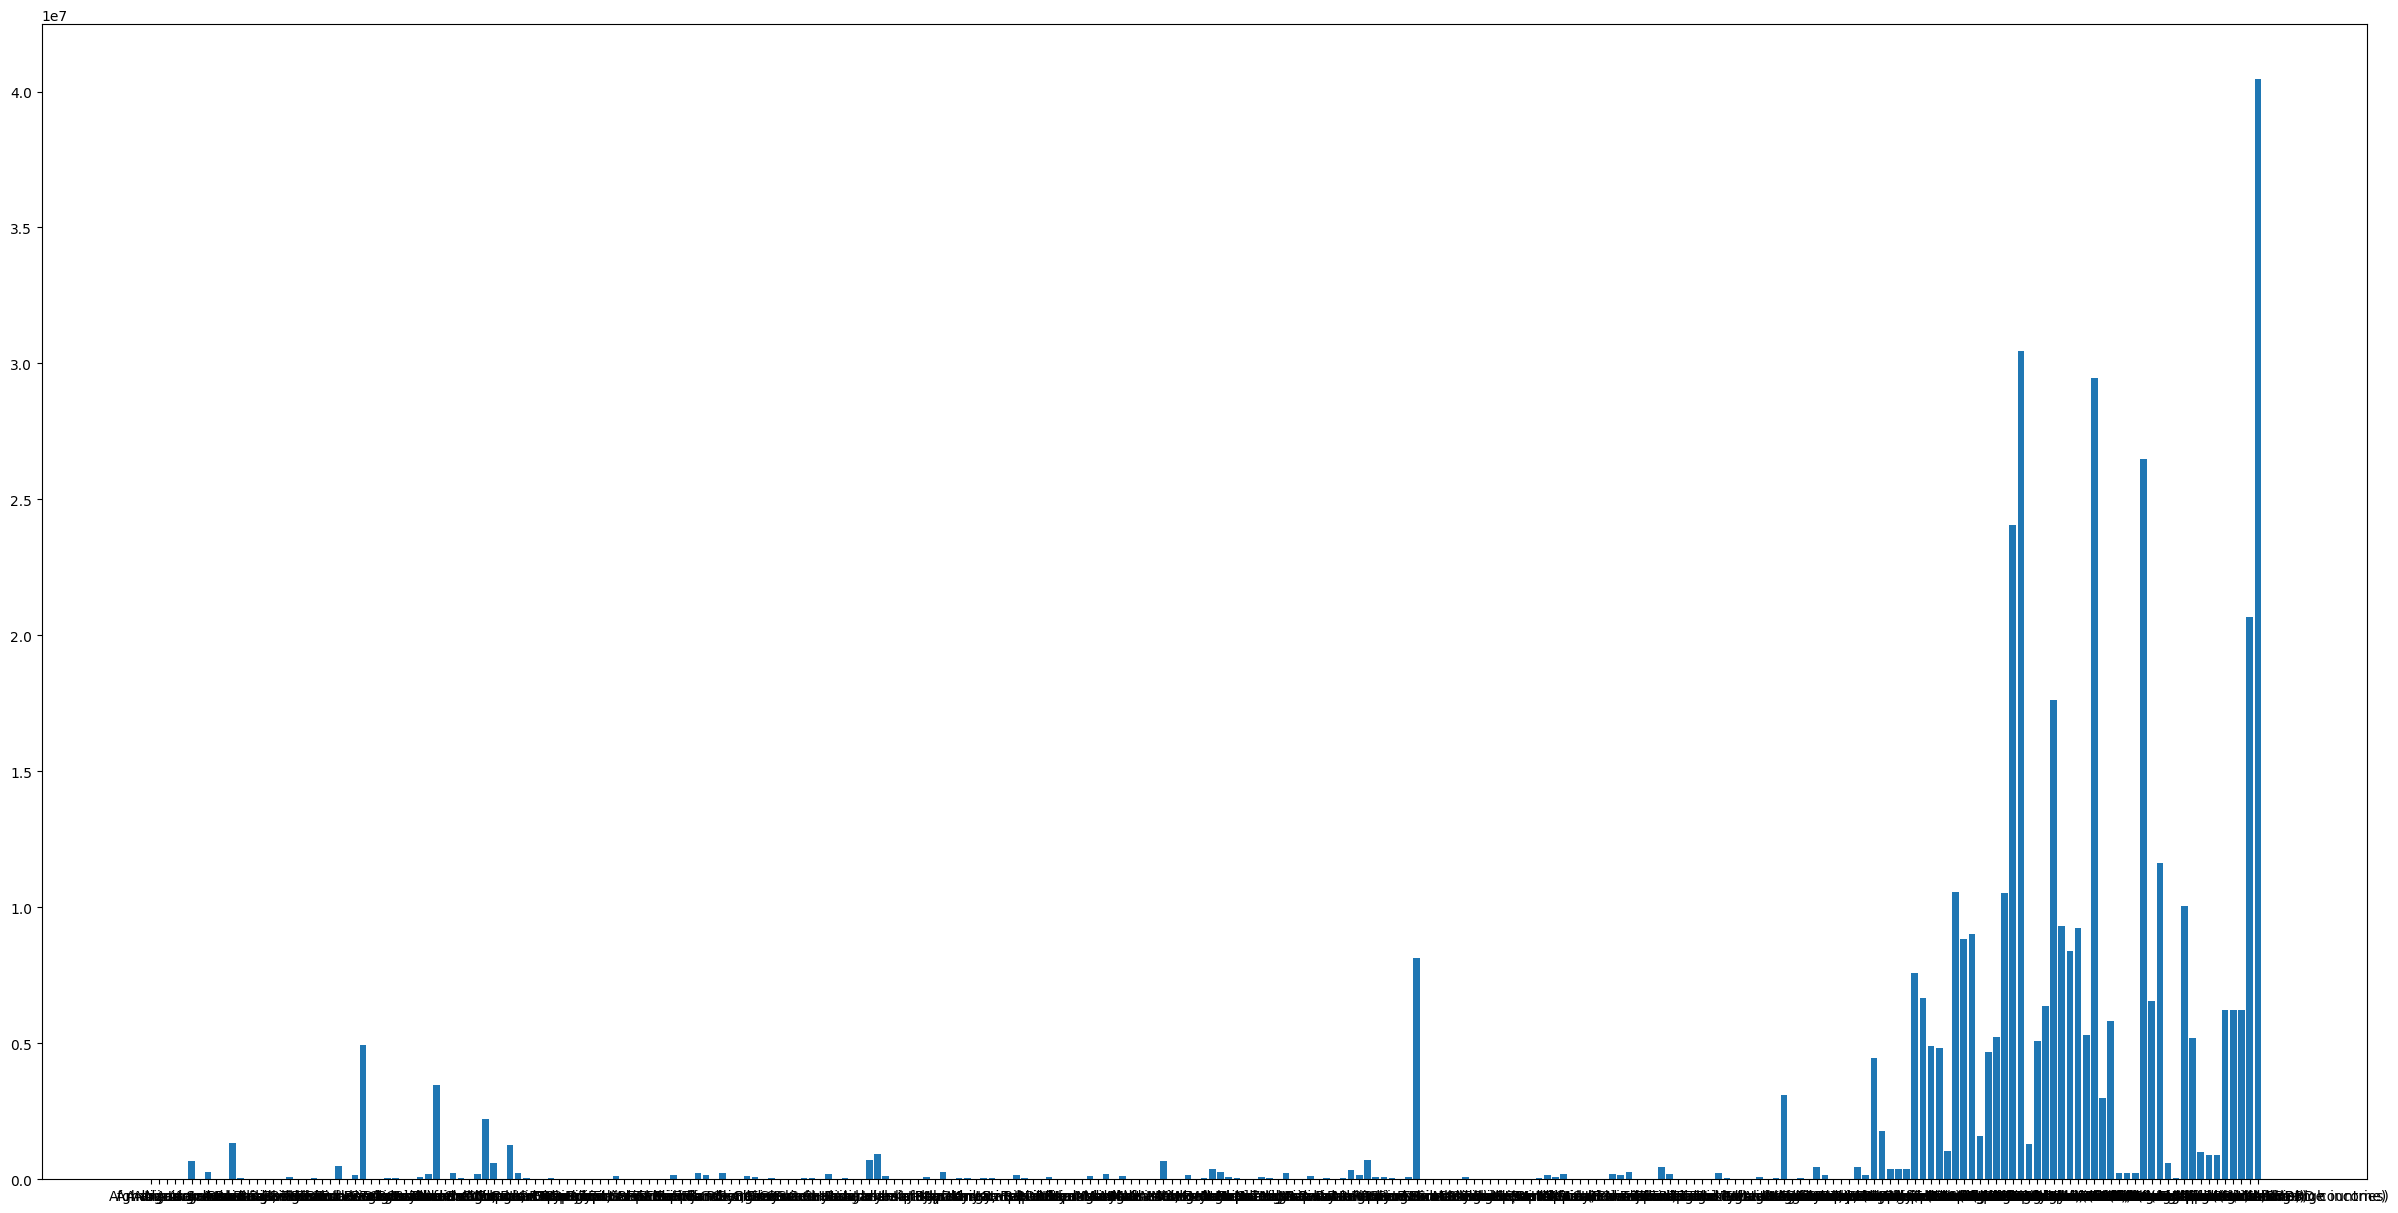

In [15]:

pd.options.display.max_rows = 4000

plt.figure(figsize=(30,15))
plt.bar(dataset[configfile['plot_config']['xvar']],dataset['2021'])

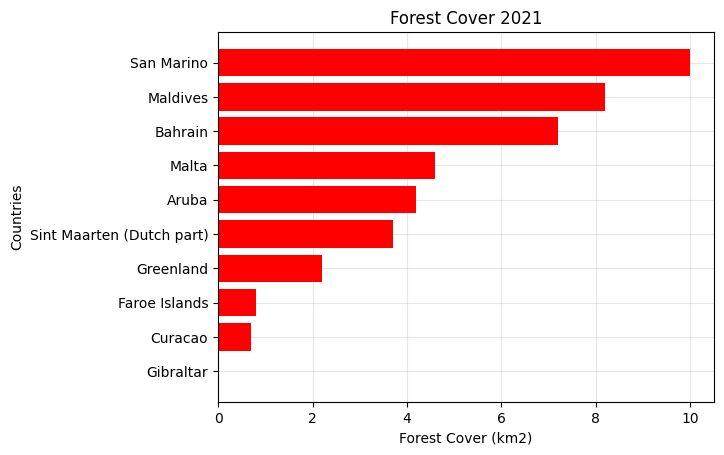

In [27]:
#Generate graph and save fig


import matplotlib.ticker as tick
top10= dataset.sort_values('2021', ascending=True).head(10)


bar_fig, bar_ax = plt.subplots()
bar_ax.barh(top10[configfile['plot_config']['xvar']], top10['2021'], color="red")
bar_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
bar_ax.set_axisbelow(True)
bar_ax.grid(alpha=0.3)
bar_ax.set_title(configfile['plot_config']['title'], fontsize='12')
bar_ax.set_xlabel(configfile['plot_config']['ylabel'], fontsize=configfile['plot_config']['Font_size'])
bar_ax.set_ylabel(configfile['plot_config']['xlabel'], fontsize=configfile['plot_config']['Font_size'])
bar_fig.savefig('forest.png')

# configfile['plot_config']['xvar']],dataset['2021'])
# bar_fig, bar_ax = plt.subplots()
# bar_ax.barh(top10['Country Name'], top10['2021'], color="red")
# bar_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
# bar_ax.set_axisbelow(True)
# bar_ax.grid(alpha=0.3)
# bar_ax.set_title('Forest Cover', fontsize='12')
# bar_ax.set_xlabel('Forest Cover (KM2)', fontsize='10')
# bar_ax.set_ylabel('Country', fontsize='10')

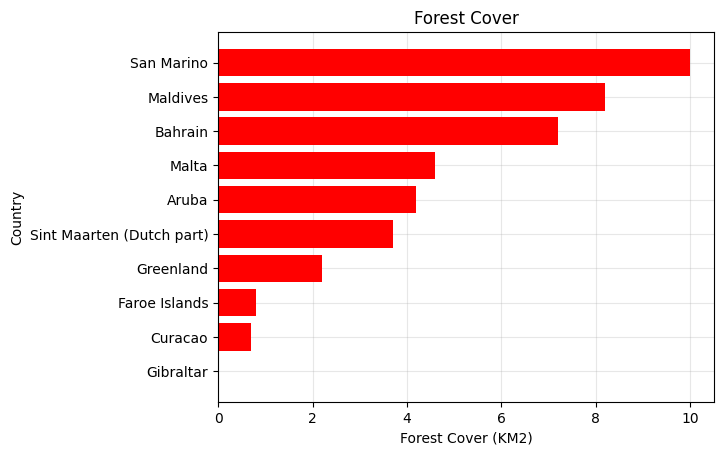

In [81]:
bar_fig

In [ ]:
import matplotlib.ticker as tick
dataset= dataset.sort_values(configfile['plot_config']['yvar'], ascending=True).head(10)



def barchart(df, xvar, yvar, colour, size, title, xlabel, ylabel)
    bar_fig, bar_ax = plt.subplots()
    bar_ax.barh(df[xvar], df['yvar']], color=colour)
    bar_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
    bar_ax.set_axisbelow(True)
    bar_ax.grid(alpha=0.3)
    bar_ax.set_title(title, fontsize='12')
    bar_ax.set_xlabel(xlabel, fontsize=size)
    bar_ax.set_ylabel(ylabel, fontsize=size)
    return bar_fig
    

bar_fig, bar_ax = plt.subplots()
    bar_ax.barh(df[configfile['plot_config']['xvar']], top10[configfile['plot_config']['yvar']], color="red")
    bar_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
    bar_ax.set_axisbelow(True)
    bar_ax.grid(alpha=0.3)
    bar_ax.set_title('Forest Cover', fontsize='12')
    bar_ax.set_xlabel('Forest Cover (KM2)', fontsize='10')
    bar_ax.set_ylabel('Country', fontsize='10')
    return bar_fig
    

def plot_bar(df, xvar, yvar, title, colour):
    plt.bar(df[xvar], df[yvar], title, color=colour)
    plt.title(title)

plot_bar(dataset, configfile['plot_config']['xvar'], configfile['plot_config']['yvar'], configfile['plot_config']['title'], configfile['plot_config']['bar_colour'])



KeyError: 2021

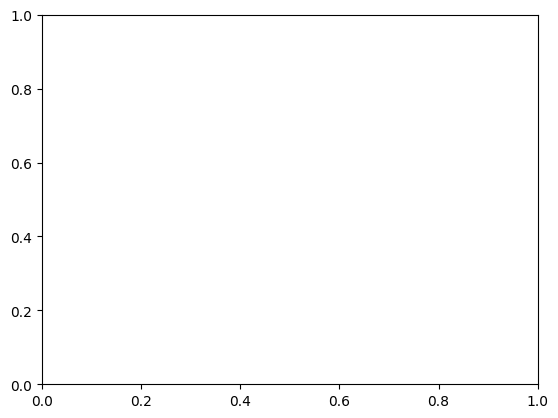

In [110]:
# def barchart(df, xvar, yvar, colour, size, title, xlabel, ylabel):
#     bar_fig, bar_ax = plt.subplots()
#     bar_ax.barh(df[xvar], df[yvar], color=colour)
#     bar_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
#     bar_ax.set_axisbelow(True)
#     bar_ax.grid(alpha=0.3)
#     bar_ax.set_title(title, fontsize='12')
#     bar_ax.set_xlabel(xlabel, fontsize=size)
#     bar_ax.set_ylabel(ylabel, fontsize=size)
#     return bar_fig
    
dataset=top10

bar_fig, bar_ax = plt.subplots()
bar_ax.barh(dataset[configfile['plot_config']['xvar']], dataset[configfile['plot_config']['yvar']], color=configfile['plot_config']['bar_colour'])
bar_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
bar_ax.set_axisbelow(True)
bar_ax.grid(alpha=0.3)
bar_ax.set_title(configfile['plot_config']['title'], fontsize='12')
bar_ax.set_xlabel('Country', fontsize=configfile['plot_config']['Font_size'])
bar_ax.set_ylabel('Year', fontsize=configfile['plot_config']['Font_size'])

    

# x = configfile['plot_config']['xvar']
# y = configfile['plot_config']['yvar']
# c = configfile['plot_config']['bar_colour']
# s = configfile['plot_config']['Font_size']
# t = configfile['plot_config']['title']
# xlab= configfile['plot_config']['xlabel']
# ylab = configfile['plot_config']['ylabel']

# # barchart(df, xvar, yvar, colour, size, title, xlabel, ylabel)
# barchart(df, x ,y, c, s, t, xlab, ylab)

In [111]:
dataset[configfile['plot_config']['xvar']]

75                     Gibraltar
50                       Curacao
65                 Faroe Islands
77                     Greenland
166    Sint Maarten (Dutch part)
9                          Aruba
120                        Malta
14                       Bahrain
118                     Maldives
158                   San Marino
Name: Country Name, dtype: object